In [1]:
import pandas as pd
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from imblearn.pipeline import Pipeline

data_df = pd.read_csv("Mapped_train_data.csv")

In [2]:
#To prevent warnings being displayed
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore") #ignoring the warnings

In [3]:
data_df = data_df.set_index("unique_id")
data_df

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1016,feature_1017,feature_1018,feature_1019,feature_1020,feature_1021,feature_1022,feature_1023,feature_1024,class
unique_id,,,,,,,,,,,,,,,,,,,,,
FFDPO1095,0.000435,0.004835,0.001156,0.001631,-0.071953,-0.524394,0.000970,-0.001261,-0.093681,0.000558,...,0.159471,-0.184401,0.759317,0.817270,0.262474,-1.294333,2.773050,0.025298,-0.361512,1
VBGHGG990,0.000490,0.002811,-0.002810,0.003657,-0.100906,0.102499,0.000837,0.002280,-0.410796,0.000421,...,-1.340315,-1.077881,-0.480608,-1.065475,0.179071,-0.526653,2.853807,-0.303671,-1.508515,0
QAGOFY895,0.000521,0.005383,0.001926,0.000966,-0.115129,-0.382085,0.000861,-0.000747,-0.219491,0.000636,...,2.244268,-0.113483,0.759855,0.497908,-0.596100,-1.273147,0.710295,1.337171,-0.479146,1
CLKIEM667,0.000262,0.006111,0.000615,0.001377,-0.076737,-0.503232,0.000929,-0.002138,-0.308278,0.000585,...,0.638294,-0.210363,1.003495,-0.008541,0.340108,-0.457311,0.899629,1.973452,-0.684340,1
DQALNF634,0.000118,0.003550,-0.002475,0.003005,-0.069995,-0.016384,0.000791,0.000333,-0.328246,0.000422,...,-0.190375,-0.816606,-0.321006,1.516188,-0.243600,-0.758915,2.071124,0.243026,-0.237539,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NXKYZA785,0.000337,0.005432,-0.000475,0.002062,-0.062630,-0.335225,0.001053,-0.000508,-0.190823,0.000554,...,-0.220692,-0.497202,0.866598,-0.476684,0.006773,-1.086358,1.150124,0.299896,-0.483027,0
VTESHP976,0.000134,0.001271,-0.001821,0.002288,-0.096010,0.109969,0.000575,0.000350,-0.382421,0.000356,...,-0.497153,-0.775131,-0.504023,1.749616,0.181102,-0.108704,1.030581,-0.077668,-0.615002,1
ASSDSL378,0.000141,0.003483,0.001503,0.001356,-0.093397,-0.266861,0.000748,-0.001621,-0.216470,0.000379,...,-0.149555,-0.598009,0.750183,0.136275,1.332982,-1.210167,2.557617,0.240068,-1.049251,2


In [4]:
data_df_corr = data_df.corr()
data_df_corr

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1016,feature_1017,feature_1018,feature_1019,feature_1020,feature_1021,feature_1022,feature_1023,feature_1024,class
feature_1,1.000000,0.456101,0.163275,0.297146,-0.428507,-0.197192,0.224033,0.077602,-0.117677,0.326235,...,-0.326562,0.056420,0.111838,-0.397305,-0.021998,-0.300260,0.063173,-0.131761,-0.236245,-0.116902
feature_2,0.456101,1.000000,0.192043,0.040355,-0.429655,-0.603240,0.620635,-0.380741,-0.360654,0.566033,...,-0.121155,0.186439,0.202994,-0.571655,-0.113435,-0.449116,0.098580,0.212738,-0.107298,-0.056563
feature_3,0.163275,0.192043,1.000000,-0.552842,-0.259491,-0.523580,0.110903,-0.429160,0.367385,0.246308,...,0.386923,0.278818,0.260516,-0.128723,-0.096288,-0.214864,0.243699,-0.040899,0.116819,-0.081100
feature_4,0.297146,0.040355,-0.552842,1.000000,-0.017801,0.441910,-0.083494,0.450126,-0.489250,-0.168059,...,-0.489621,-0.344087,-0.175078,-0.075978,0.107710,0.058969,-0.283211,-0.053190,-0.346040,-0.106115
feature_5,-0.428507,-0.429655,-0.259491,-0.017801,1.000000,0.259203,-0.227328,0.139737,0.295293,-0.400650,...,0.150631,0.073019,-0.325412,0.333500,-0.016360,0.333898,-0.159773,0.019951,0.183060,0.139855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature_1021,-0.300260,-0.449116,-0.214864,0.058969,0.333898,0.394313,-0.336131,0.217358,0.052896,-0.348927,...,0.059989,-0.093939,-0.189337,0.446212,0.247393,1.000000,-0.270273,0.082288,0.192212,0.071250
feature_1022,0.063173,0.098580,0.243699,-0.283211,-0.159773,-0.216118,0.092119,-0.379262,0.079848,0.355090,...,0.208016,-0.111136,-0.244645,-0.084406,-0.239884,-0.270273,1.000000,-0.128335,0.053470,-0.024376
feature_1023,-0.131761,0.212738,-0.040899,-0.053190,0.019951,-0.259427,0.203657,-0.190962,-0.259847,0.120768,...,0.150918,0.147918,0.078587,0.012672,-0.031049,0.082288,-0.128335,1.000000,0.126487,-0.023301
feature_1024,-0.236245,-0.107298,0.116819,-0.346040,0.183060,-0.261479,0.174838,-0.279198,0.213861,-0.049546,...,0.295111,0.220484,-0.037868,0.297670,0.115736,0.192212,0.053470,0.126487,1.000000,0.146893


In [5]:
#Fetaure Filtering - Removing Features which are highly correlated by choosing a threshold of 0.90
#https://stackabuse.com/applying-filter-methods-in-python-for-feature-selection/
correlated_features = set()
class_feature = len(data_df_corr.columns)-1
for i in range(len(data_df_corr.columns)):
    for j in range(i):
        if abs(data_df_corr.iloc[i, j]) > 0.90:
            print("Correlation value between features {} and {} is {}".format(data_df_corr.columns[i],data_df_corr.columns[j],data_df_corr.iloc[i, j]))
            if abs(data_df_corr.iloc[i,class_feature]) > abs(data_df_corr.iloc[j,class_feature]):
                print("Correlation value between feature {} and {} is {}".format(data_df_corr.columns[i],"class",data_df_corr.iloc[i, class_feature]))
                print("Correlation value between feature {} and {} is {}".format(data_df_corr.columns[j],"class",data_df_corr.iloc[j, class_feature]))
                print("{} is highly correlated with {} than feature {} hence removing {}".format(data_df_corr.columns[i],class_feature,data_df_corr.columns[j],data_df_corr.columns[j]))
                colname = data_df_corr.columns[j]
            else:
                print("Correlation value between feature {} and {} is {}".format(data_df_corr.columns[i],"class",data_df_corr.iloc[i, class_feature]))
                print("Correlation value between feature {} and {} is {}".format(data_df_corr.columns[j],"class",data_df_corr.iloc[j, class_feature]))
                print("{} is highly correlated with {} than feature {} hence removing {}".format(data_df_corr.columns[j],class_feature,data_df_corr.columns[i],data_df_corr.columns[i]))
                colname = data_df_corr.columns[i]
            correlated_features.add(colname)
            print("="*10)
print(correlated_features)

Correlation value between features feature_211 and feature_18 is 0.9002594036284627
Correlation value between feature feature_211 and class is 0.06057242732427918
Correlation value between feature feature_18 and class is 0.06474612471957344
feature_18 is highly correlated with 1024 than feature feature_211 hence removing feature_211
Correlation value between features feature_233 and feature_107 is -0.9293232002657525
Correlation value between feature feature_233 and class is -0.07872607283508178
Correlation value between feature feature_107 and class is 0.009806336738873267
feature_233 is highly correlated with 1024 than feature feature_107 hence removing feature_107
Correlation value between features feature_233 and feature_211 is -0.9074442017416635
Correlation value between feature feature_233 and class is -0.07872607283508178
Correlation value between feature feature_211 and class is 0.06057242732427918
feature_233 is highly correlated with 1024 than feature feature_211 hence remov

In [6]:
data_df.drop(columns=['feature_211', 'feature_233', 'feature_107', 'feature_336'],inplace=True)

In [7]:
data_df.to_csv("data_df.csv")

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix,f1_score,precision_score,recall_score,RocCurveDisplay,PrecisionRecallDisplay
from sklearn.model_selection import train_test_split
rs = 0

In [9]:
#Splitting the dataset into train dataset and test dataset
data_df_features = data_df.drop(columns=["class"]) #Extracting Features
data_df_class = data_df[["class"]] #Saving only Class labels

"""Splitting the data to Train and Test in a proportion of 80% and 20% respectively, since the data is imbalanced we
want to reserve the proportion of the imbalance in train and test set hence we would be using startify parameter which
does the splitting based on the values distribution present in the class label column"""
X_train, X_test, y_train, y_test = train_test_split(data_df_features, data_df_class, test_size=0.20, random_state=rs, stratify = data_df_class)

In [10]:
#Hyperparameter Tuning of K Nearest Neighbor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
rs = 0

knn = KNeighborsClassifier()
params = {
    'n_neighbors': list(range(1, 32, 2))
}
grid_search = GridSearchCV(estimator=knn, 
                           param_grid=params, 
                           cv=5, verbose=10, scoring = "f1_macro")
grid_search.fit(X_train,y_train)
knn_best = grid_search.best_estimator_
print(knn_best)
knn_best.fit(X_train, y_train) #Fitting on the train data
knn_yPred = knn_best.predict(X_test) #Predicting on test data

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START n_neighbors=1..............................................
[CV 1/5; 1/16] END ...............n_neighbors=1;, score=0.364 total time=   0.0s
[CV 2/5; 1/16] START n_neighbors=1..............................................
[CV 2/5; 1/16] END ...............n_neighbors=1;, score=0.252 total time=   0.0s
[CV 3/5; 1/16] START n_neighbors=1..............................................
[CV 3/5; 1/16] END ...............n_neighbors=1;, score=0.281 total time=   0.0s
[CV 4/5; 1/16] START n_neighbors=1..............................................
[CV 4/5; 1/16] END ...............n_neighbors=1;, score=0.287 total time=   0.0s
[CV 5/5; 1/16] START n_neighbors=1..............................................
[CV 5/5; 1/16] END ...............n_neighbors=1;, score=0.423 total time=   0.0s
[CV 1/5; 2/16] START n_neighbors=3..............................................
[CV 1/5; 2/16] END ...............n_neighbors=3;

[CV 2/5; 11/16] END .............n_neighbors=21;, score=0.452 total time=   0.0s
[CV 3/5; 11/16] START n_neighbors=21............................................
[CV 3/5; 11/16] END .............n_neighbors=21;, score=0.259 total time=   0.0s
[CV 4/5; 11/16] START n_neighbors=21............................................
[CV 4/5; 11/16] END .............n_neighbors=21;, score=0.322 total time=   0.0s
[CV 5/5; 11/16] START n_neighbors=21............................................
[CV 5/5; 11/16] END .............n_neighbors=21;, score=0.460 total time=   0.0s
[CV 1/5; 12/16] START n_neighbors=23............................................
[CV 1/5; 12/16] END .............n_neighbors=23;, score=0.412 total time=   0.0s
[CV 2/5; 12/16] START n_neighbors=23............................................
[CV 2/5; 12/16] END .............n_neighbors=23;, score=0.434 total time=   0.0s
[CV 3/5; 12/16] START n_neighbors=23............................................
[CV 3/5; 12/16] END ........

In [11]:
#Function to obtain different metrics based on predicted class labels
def print_metrics(y_test,y_pred,name):
    cm = confusion_matrix(y_test, y_pred) #Computing the Confusion Matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues") #Initializing the Heatmap
    plt.xlabel("Predicted Labels") #Setting x label
    plt.ylabel("Actual Labels") #Setting y label
    plt.title("Confusion Matrix Obtained") #Setting the title
    plt.show(); #Showing the plot
    f1_value = round(f1_score(y_test,y_pred,labels=np.unique(y_pred),average='macro'),4) #Calculating F1-score value
    prec = round(precision_score(y_test,y_pred,labels=np.unique(y_pred),average='macro'),4) #Calculating Precision value
    rec = round(recall_score(y_test,y_pred,labels=np.unique(y_pred),average='macro'),4) #Calculating Recall value
    print("F1-score obtained is ",f1_value) #Printing F1-score value
    print("Precision obtained is ",prec) #Printing Precision value
    print("Recall obtained is ",rec) #Printing Recall value
    print("Classification Report obtained is :")
    print(classification_report(y_test, y_pred))
    return [f1_value,prec,rec] #return f1-score, precision and recall

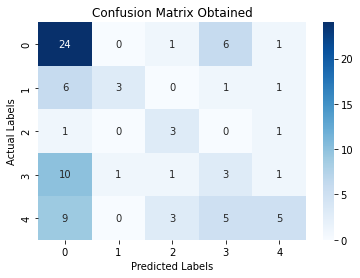

F1-score obtained is  0.3926
Precision obtained is  0.4721
Recall obtained is  0.4075
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.48      0.75      0.59        32
           1       0.75      0.27      0.40        11
           2       0.38      0.60      0.46         5
           3       0.20      0.19      0.19        16
           4       0.56      0.23      0.32        22

    accuracy                           0.44        86
   macro avg       0.47      0.41      0.39        86
weighted avg       0.48      0.44      0.41        86



In [12]:
results_table = []

#Performance Metrics obtained using Decision Tree
knn_list = ["KNN"]
knn_list.extend(print_metrics(y_test,knn_yPred,"KNN"))
results_table.append(knn_list)

100%|██████████| 339/339 [05:57<00:00,  1.05s/it]


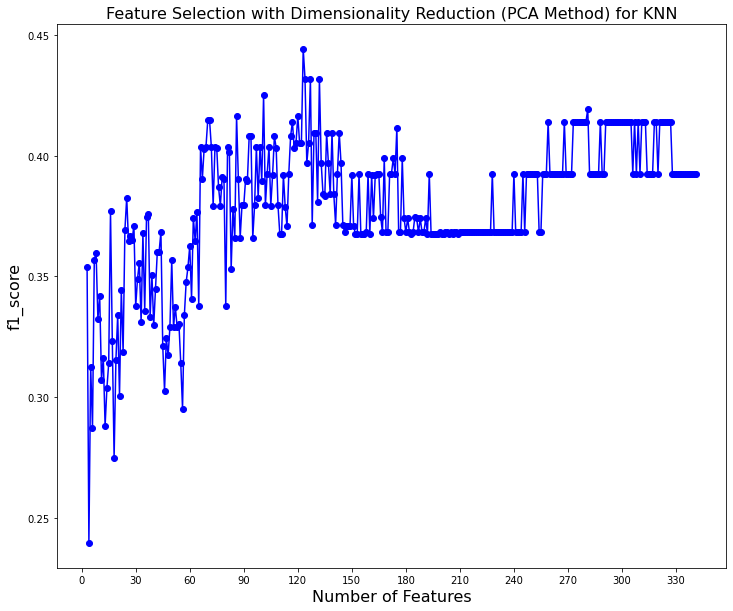

KNN Model - Maximum f1-score obtained using PCA is 0.4443 for the number of components = 123


In [13]:
from tqdm import tqdm
from sklearn.decomposition import PCA

knn = KNeighborsClassifier(n_neighbors=15)
f1_dict = {}

#for nf in tqdm(range(3,X_train.shape[1]+1)):
for nf in tqdm(range(3,min(X_train.shape[1],X_train.shape[0])+1)):
    f1_val = []
    pca = PCA(n_components=nf,random_state=rs)
    pca_train = pca.fit_transform(X_train)
    knn.fit(pca_train,y_train)
    pca_test = pca.transform(X_test)
    pca_test_predict = knn.predict(pca_test)
    f1_val.append(round(f1_score(y_test,pca_test_predict,labels=np.unique(pca_test_predict),average='macro'),4))
    f1_dict[nf] = round(sum(f1_val)/len(f1_val),4)
plt.figure(figsize=(12,10))
plt.plot(*zip(*sorted(f1_dict.items())),color='blue',marker='o')
Title = "Feature Selection with Dimensionality Reduction (PCA Method) for KNN"
plt.title(Title, fontsize=16)
plt.xticks(range(0,min(X_train.shape[0],X_train.shape[1])+1,30))
plt.xlabel("Number of Features", fontsize=16)
plt.ylabel("f1_score", fontsize=16)
plt.show();
f1_adasyn_knn = max(f1_dict.values())
f1_nfea_adasyn_knn =  max(f1_dict, key=f1_dict.get)
print("KNN Model - Maximum f1-score obtained using PCA is {} for the number of components = {}".format(f1_adasyn_knn,f1_nfea_adasyn_knn))

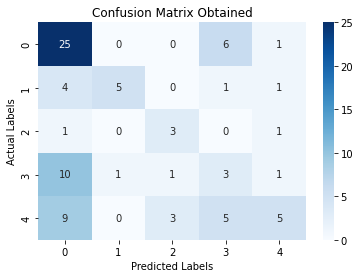

F1-score obtained is  0.4443
Precision obtained is  0.5055
Recall obtained is  0.4501
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.51      0.78      0.62        32
           1       0.83      0.45      0.59        11
           2       0.43      0.60      0.50         5
           3       0.20      0.19      0.19        16
           4       0.56      0.23      0.32        22

    accuracy                           0.48        86
   macro avg       0.51      0.45      0.44        86
weighted avg       0.50      0.48      0.45        86



In [14]:
knn = KNeighborsClassifier(n_neighbors=15)
pca = PCA(n_components=123,random_state=rs)

knn_pca_pipeline = Pipeline([('pca', pca), ('knn', knn)])
knn_pca_pipeline.fit(X_train,y_train)
knn_pca_pipeline_yPred = knn_pca_pipeline.predict(X_test)
knn_list = ["KNN - After Hyperparameter Tuning and Feature Selection based on PCA"]
knn_list.extend(print_metrics(y_test, knn_pca_pipeline_yPred,"KNN - PCA"))
results_table.append(knn_list)

In [17]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=rs)
knn = KNeighborsClassifier()
params = {
    'knn__n_neighbors': list(range(1, 32, 2))
}
pipeline = Pipeline([('adasyn',adasyn),('knn',knn)])
grid_search = GridSearchCV(estimator=pipeline, param_grid=params, cv=5, n_jobs=-1, verbose=1, scoring = "f1_macro")
grid_search.fit(X_train, y_train)

knn_best = grid_search.best_estimator_
print(knn_best)
knn_best.fit(X_train, y_train) #Fitting on the train data
knn_yPred = knn_best.predict(X_test) #Predicting on test data

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('knn', KNeighborsClassifier(n_neighbors=1))])


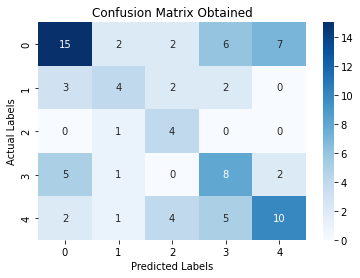

F1-score obtained is  0.4634
Precision obtained is  0.457
Recall obtained is  0.5174
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.60      0.47      0.53        32
           1       0.44      0.36      0.40        11
           2       0.33      0.80      0.47         5
           3       0.38      0.50      0.43        16
           4       0.53      0.45      0.49        22

    accuracy                           0.48        86
   macro avg       0.46      0.52      0.46        86
weighted avg       0.50      0.48      0.48        86



In [18]:
knn_list = ["KNN - ADASYN"]
knn_list.extend(print_metrics(y_test,knn_yPred,"KNN - ADASYN"))
results_table.append(knn_list)

100%|██████████| 339/339 [09:20<00:00,  1.65s/it]


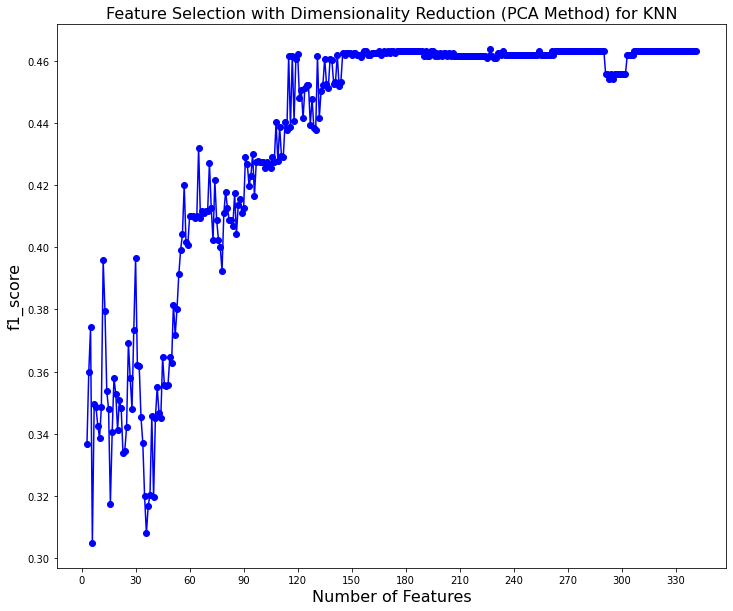

KNN Model - Maximum f1-score obtained using PCA is 0.464 for the number of components = 227


In [19]:
from tqdm import tqdm
from sklearn.decomposition import PCA

f1_dict = {}

#for nf in tqdm(range(3,X_train.shape[1]+1)):
for nf in tqdm(range(3,min(X_train.shape[1],X_train.shape[0])+1)):
    f1_val = []
    knn_pipeline = Pipeline(steps=[('adasyn', ADASYN(random_state=0)),('pca' , PCA(n_components=nf,random_state=rs)),
                ('knn',KNeighborsClassifier(n_neighbors=1))])
    knn_pipeline.fit(X_train,y_train)
    pca_test_predict = knn_pipeline.predict(X_test)
    f1_val.append(round(f1_score(y_test,pca_test_predict,labels=np.unique(pca_test_predict),average='macro'),4))
    f1_dict[nf] = round(sum(f1_val)/len(f1_val),4)
plt.figure(figsize=(12,10))
plt.plot(*zip(*sorted(f1_dict.items())),color='blue',marker='o')
Title = "Feature Selection with Dimensionality Reduction (PCA Method) for KNN"
plt.title(Title, fontsize=16)
plt.xticks(range(0,min(X_train.shape[0],X_train.shape[1])+1,30))
plt.xlabel("Number of Features", fontsize=16)
plt.ylabel("f1_score", fontsize=16)
plt.show();
f1_adasyn_knn = max(f1_dict.values())
f1_nfea_adasyn_knn =  max(f1_dict, key=f1_dict.get)
print("KNN Model - Maximum f1-score obtained using PCA is {} for the number of components = {}".format(f1_adasyn_knn,f1_nfea_adasyn_knn))

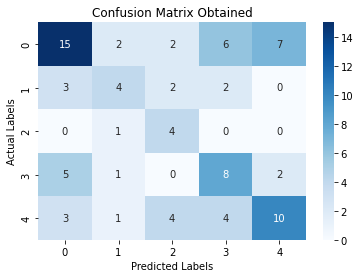

F1-score obtained is  0.464
Precision obtained is  0.4562
Recall obtained is  0.5174
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.58      0.47      0.52        32
           1       0.44      0.36      0.40        11
           2       0.33      0.80      0.47         5
           3       0.40      0.50      0.44        16
           4       0.53      0.45      0.49        22

    accuracy                           0.48        86
   macro avg       0.46      0.52      0.46        86
weighted avg       0.50      0.48      0.48        86



In [20]:
knn_pca_pipeline = Pipeline(steps=[('adasyn', ADASYN(random_state=0)),('pca' , PCA(n_components=227,random_state=rs)),
                ('knn',KNeighborsClassifier(n_neighbors=1))])
knn_pca_pipeline.fit(X_train,y_train)
knn_pca_pipeline_yPred = knn_pca_pipeline.predict(X_test)
knn_list = ["KNN ADASYN- After Hyperparameter Tuning and Feature Selection based on PCA"]
knn_list.extend(print_metrics(y_test, knn_pca_pipeline_yPred,"KNN - PCA"))
results_table.append(knn_list)

In [21]:
results_table

[['KNN', 0.3926, 0.4721, 0.4075],
 ['KNN - After Hyperparameter Tuning and Feature Selection based on PCA',
  0.4443,
  0.5055,
  0.4501],
 ['KNN - ADASYN', 0.4634, 0.457, 0.5174],
 ['KNN ADASYN- After Hyperparameter Tuning and Feature Selection based on PCA',
  0.464,
  0.4562,
  0.5174]]

In [29]:
#Tabulating the obtained results and displaying the results by formatting
results_df = pd.DataFrame(results_table,columns = ["Classifier","f1-score","Precision","Recall"])
with pd.option_context('display.precision', 4):
    formatted_table=(results_df.style.background_gradient(cmap ='Blues'))
formatted_table

,Classifier,f1-score,Precision,Recall
0,KNN,0.3926,0.4721,0.4075
1,KNN - After Hyperparameter Tuning and Feature Selection based on PCA,0.4443,0.5055,0.4501
2,KNN - ADASYN,0.4634,0.4570,0.5174
3,KNN ADASYN- After Hyperparameter Tuning and Feature Selection based on PCA,0.4640,0.4562,0.5174


In [22]:
#Tabulating the obtained results and displaying the results by formatting
results_df = pd.DataFrame(results_table,columns = ["Classifier","f1-score","Precision","Recall"])
with pd.option_context('display.precision', 4):
    formatted_table=(results_df.style.background_gradient(cmap ='Blues'))
formatted_table

,Classifier,f1-score,Precision,Recall
0,KNN,0.3926,0.4721,0.4075
1,KNN - After Hyperparameter Tuning and Feature Selection based on PCA,0.4443,0.5055,0.4501
2,KNN - ADASYN,0.4634,0.4570,0.5174
3,KNN ADASYN- After Hyperparameter Tuning and Feature Selection based on PCA,0.4640,0.4562,0.5174
